In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import random
import os

In [9]:
# Load .bil file
input_folder = 'C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Cropped Berry/'
output_folder = 'C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Patches/'  # Folder to save patches
os.makedirs(output_folder, exist_ok=True)

bil_file = input_folder + 'Good Blueberry 85-126-FromSelection-ConvertFormat.bil'  # Update this with your file path

# Read the .bil file
with rasterio.open(bil_file) as src:
    bands = src.read()  # Shape: (bands, height, width)
    profile = src.profile  # Get metadata profile for saving patches

# Check the data
print(f'Bands: {bands.shape[0]}')
print(f'Height: {bands.shape[1]}')
print(f'Width: {bands.shape[2]}')




Bands: 462
Height: 1533
Width: 1302


In [10]:
# Set patch size
SIZE = 220  # Choose the patch size, e.g., 220x220

# Loop through the image data to cut out patches and save
patch_count = 0
patch_files = []  # Store file paths for plotting
for y in range(0, bands.shape[1], SIZE):  # Iterate over height
    for x in range(0, bands.shape[2], SIZE):  # Iterate over width
        # Extract a patch from all bands
        patch = bands[:, y:y+SIZE, x:x+SIZE]  # Shape: (bands, SIZE, SIZE)
        if patch.shape[1] == SIZE and patch.shape[2] == SIZE:  # Ensure full patch size
            patch_count += 1
            patch_filename = f'patch_{patch_count:04d}.bil'
            patch_path = os.path.join(output_folder, patch_filename)
            
             # Update profile for the patch
            patch_profile = profile.copy()
            patch_profile.update({
                'height': SIZE,
                'width': SIZE,
                'transform': rasterio.windows.transform(
                    rasterio.windows.Window(x, y, SIZE, SIZE), src.transform
                )
            })
            # Write the patch as .bil
            with rasterio.open(patch_path, 'w', **patch_profile) as dst:
                dst.write(patch)
                
            patch_files.append(patch_path)  # Save patch path for plotting

print(f'Saved {patch_count} patches as .bil files in {output_folder}')


Saved 30 patches as .bil files in C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Patches/


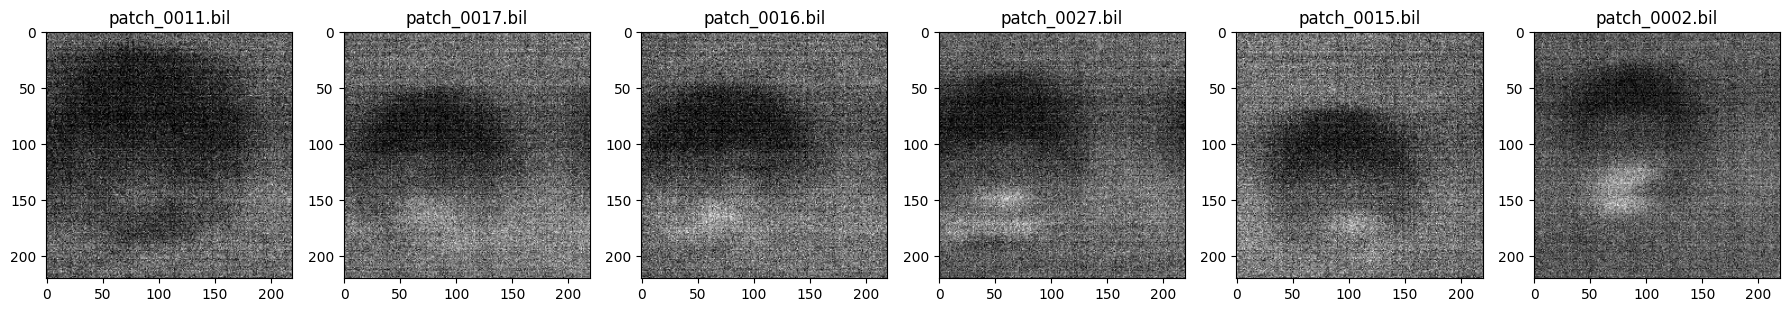

In [11]:
# Plot a few random patches
num_samples_to_display = 6
f = plt.figure(figsize=(18, 3))
ax = f.subplots(1, num_samples_to_display)

for i in range(num_samples_to_display):
    random_patch_path = random.choice(patch_files)  # Choose a random patch file
    with rasterio.open(random_patch_path) as patch_src:
        patch_data = patch_src.read(1)  # Read the first band for visualization
    
    ax[i].imshow(patch_data, cmap='gray')
    ax[i].set_title(os.path.basename(random_patch_path))

plt.tight_layout()
plt.show()

In [ ]:
Testing mask

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import random
import os
# Load .bil file


bil_file = "C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Patches_Bad(1-42)/patch_0002.bil"  # Update this with your file path

# Read the .bil file
with rasterio.open(bil_file) as src:
    bands = src.read()  # Shape: (bands, height, width)
    profile = src.profile  # Get metadata profile for saving patches

# Check the data
print(f'Bands: {bands.shape[0]}')
print(f'Height: {bands.shape[1]}')
print(f'Width: {bands.shape[2]}')

Bands: 462
Height: 220
Width: 220


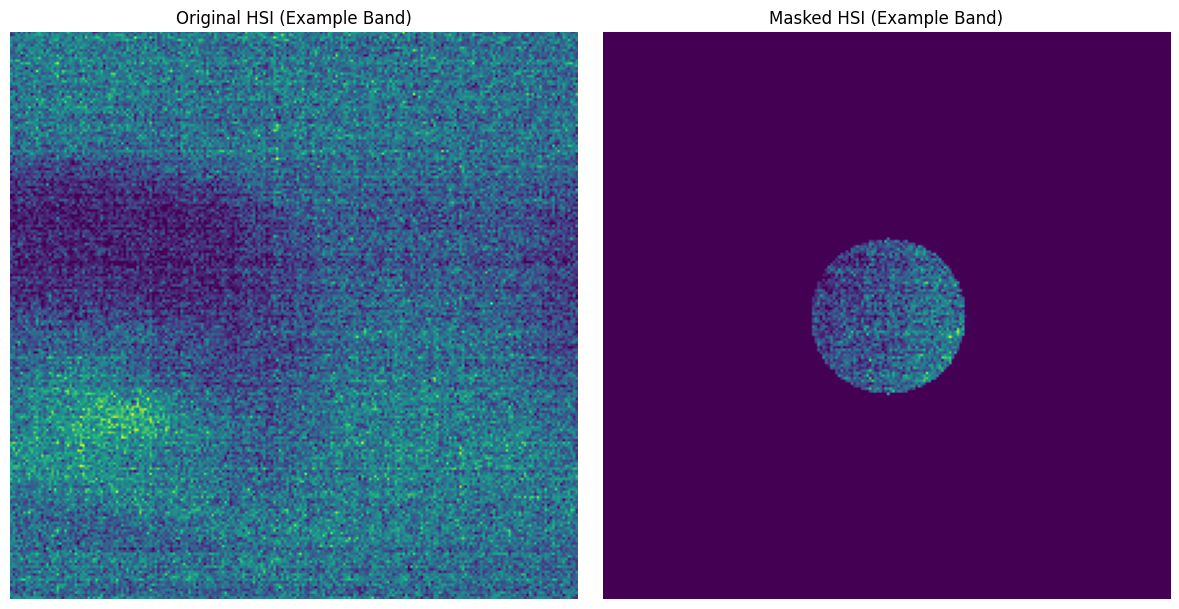

In [5]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Function to create the circular mask
def create_circular_mask(size, radius):
    y, x = np.ogrid[:size, :size]
    center = size // 2
    dist_from_center = np.sqrt((x - center)**2 + (y - center)**2)
    mask = dist_from_center <= radius
    return mask

# Load the .bil file
input_bil_file = "C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Patches_Bad(1-42)/patch_0029.bil"  # Replace with your .bil file path
output_bil_file = "C:/Users/zarin/OneDrive/Desktop/NSU/12th Semester/CSE 499/Datasets/Blueberry/Patches_Bad(1-42)/patch_0029_masked_file.bil"  # Output file path

with rasterio.open(input_bil_file) as src:
    hsi_data = src.read()  # Reads as (bands, height, width)
    profile = src.profile  # Metadata of the file

# Create the circular mask
height, width = hsi_data.shape[1], hsi_data.shape[2]
radius = 30  # Adjust the radius as needed
circular_mask = create_circular_mask(height, radius)

# Apply the mask to all bands
masked_hsi_data = hsi_data * circular_mask[np.newaxis, :, :]  # Broadcasting mask

# Save the masked data back to a .bil file
profile.update(dtype=masked_hsi_data.dtype)  # Update metadata if needed
with rasterio.open(output_bil_file, 'w', **profile) as dst:
    dst.write(masked_hsi_data)

# Visualize an example band before and after masking
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original HSI (Example Band)")
plt.imshow(hsi_data[0, :, :], cmap='viridis')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Masked HSI (Example Band)")
plt.imshow(masked_hsi_data[0, :, :], cmap='viridis')
plt.axis('off')

plt.tight_layout()
plt.show()
